<a href="https://colab.research.google.com/github/demichie/Principles-of-Numerical-Modelling-in-Geosciences/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: Differential Equations in Geosciences and Python Essentials

This chapter serves as an introduction to the fundamental role of differential equations in describing Earth science phenomena and lays the groundwork for using Python as a computational tool for their numerical solution. We begin by exploring why differential equations are so prevalent in geosciences, illustrating with examples such as cooling processes and radioactive decay. Subsequently, we introduce the Python programming language, covering basic syntax, essential data structures like lists, and the powerful libraries NumPy and Matplotlib, which are indispensable for scientific computing and visualization.

## 2.1 The Language of Change: Differential Equations in Earth Sciences

Many of the processes that shape our planet involve quantities that change over time and/or space. These dynamic phenomena are governed by fundamental physical laws (e.g., conservation of mass, momentum, and energy), which, when translated into precise mathematical statements, frequently take the form of **differential equations**.

A differential equation relates a function with its derivatives (rates of change). Understanding these equations allows us to quantify, simulate, and predict the behavior of complex natural systems. We will encounter two main types:
- **Ordinary Differential Equations (ODEs)**, where the unknown function depends on a single independent variable (typically time).
- **Partial Differential Equations (PDEs)**, where the unknown function depends on multiple independent variables (e.g., time and space).

While analytical solutions are possible for simple cases, most real-world problems require **numerical methods** to find approximate solutions.

### 2.1.1 Example: Cooling Processes and Newton's Law

Cooling is a ubiquitous process in Earth sciences. Newton's Law of Cooling states that the rate at which an object cools is proportional to the temperature difference between the object and its surroundings.

If $T(t)$ is the object's temperature and $T_{\text{env}}$ is the environment's temperature, the law can be expressed as a **first-order linear ordinary differential equation (ODE)**:
$$
\frac{dT}{dt} = -k (T(t) - T_{\text{env}})
$$
where $k$ is a positive cooling coefficient. This is a *lumped-parameter model*, which assumes the temperature $T$ is uniform throughout the object at any given time.

### 2.1.2 Example: Radioactive Decay

Radioactive decay, the cornerstone of radiometric dating, is another process described by a simple ODE. The rate of decay of a parent isotope is proportional to the number of radioactive atoms, $N(t)$, currently present.

This relationship is described by the ODE:
$$
\frac{dN(t)}{dt} = -\lambda N(t)
$$
where $\lambda$ is the **decay constant**. Given an initial number of atoms $N_0$, the analytical solution is:
$$
N(t) = N_0 e^{-\lambda t}
$$

### 2.1.3 Ordinary vs. Partial Differential Equations: A First Look

The two examples above are **ODEs** because the unknown functions ($T(t)$, $N(t)$) depend only on a single variable, time.

However, many phenomena depend on multiple variables, like time *and* space. These require **Partial Differential Equations (PDEs)**. For example, the temperature in a large lava flow, $T(x,t)$, which varies with depth $x$ and time $t$, can be modeled by the heat equation:
$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2}
$$
Here, we have partial derivatives with respect to both time and space. We will start with ODEs before tackling PDEs in later chapters.

<div class="alert alert-block alert-info">
    <b>Concept Check!</b>
    <br>
    <ul>
        <li>Can you think of a geoscience process where something changes over time or space? What changes, and what causes the change?</li>
    </ul>
</div>

### 2.1.4 Characterizing Differential Equations: Order and Linearity

#### Order of a Differential Equation
The **order** is the highest-order derivative present in the equation.
- **First-Order:** Radioactive decay, $\frac{dN}{dt} = -\lambda N$.
- **Second-Order:** The 1D heat equation, $\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2}$.

#### Linearity and Nonlinearity
A differential equation is **linear** if the unknown function and its derivatives appear linearly (i.e., not multiplied by each other, not raised to powers other than 1, not inside other functions like `sin(u)`).

An equation that is not linear is called **nonlinear**. Nonlinearities can arise in many ways:
*   The unknown function or its derivatives are raised to a power other than one (e.g., $u^2 +\frac{\partial u}{\partial x}$ which contains $u^2$, making it nonlinear, or a term like $(\frac{\partial u}{\partial x})^2$).
*   Products of the unknown function and its derivatives (e.g., $\phi \frac{\partial \phi}{\partial x}$).
*   The unknown function appears as the argument of a nonlinear function (e.g., $\sin(\phi)$).
*   Coefficients that depend on the unknown function itself (e.g., in Richards' equation for unsaturated flow, the hydraulic conductivity $K(\theta)$ depends on the water content $\theta$, making the term $\frac{\partial}{\partial z}(K(\theta)\frac{\partial \psi}{\partial z})$ nonlinear).

Nonlinear equations are generally much harder to solve and can exhibit more complex behaviors.

## 2.2 Introduction to Python for Numerical Modelling

We will use **Python** for its readability and rich ecosystem of scientific libraries. We will primarily use **Jupyter Notebooks**, which allow us to combine live code, equations, and explanatory text in a single, interactive document.

### 2.2.1 Python Syntax Basics
#### Variables and Assignment
Python is **dynamically typed**, so you don't declare a variable's type.

In [1]:
# Assigning different data types to variables
x = 3.0           # x is now a floating-point number (float)
name = "basalt"   # name is now a string (str)
is_volcano = True # is_volcano is now a boolean (bool)
count = 10        # count is now an integer (int)

# You can print the value and type of a variable
print(x, type(x))
print(name, type(name))

3.0 <class 'float'>
basalt <class 'str'>


#### Indentation
Python uses **indentation** (strictly, 4 spaces per level) to define code blocks.

In [2]:
# Example of a for loop and an if statement
for i in range(3):  # The colon indicates the start of a block
    print("Outer loop, i =", i) # This line is indented, part of the for loop
    if i % 2 == 0: # Another block starts here
        print("   i is even") # Further indented, part of the if block
    else:
        print("   i is odd")  # Also part of the else block
print("Loop finished") # This line is not indented, so it's outside the for loop

Outer loop, i = 0
   i is even
Outer loop, i = 1
   i is odd
Outer loop, i = 2
   i is even
Loop finished


#### Comments
Comments start with `#`. Docstrings are enclosed in `"""..."""`.

In [3]:
# This is a single-line comment explaining the next line
gravity_g = 9.81  # m/s^2, standard gravity

"""
This is a
multi-line comment using triple quotes.
It can span several lines.
"""

def calculate_area(radius):
    """This is a docstring. It explains what the function does."""
    return 3.14159 * radius**2

#### Line Length and Line Continuation
For readability, long lines can be broken up inside `()`, `[]`, or `{}` (implicit continuation), or with a backslash `\` (explicit continuation).

In [4]:
# Implicit line continuation in Python.
# Long list definition
my_long_list = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
    16, 17, 18, 19, 20, # Comments can also be on continued lines
    ]

# Long arithmetic expression within parentheses
first_value, second_value, third_value, fourth_value, fifth_value = 1,2,3,4,5
total_value = (first_value + second_value + third_value
               - fourth_value + fifth_value)

In [5]:
# Explicit line continuation using backslash.
# Long assignment statement using backslash
x = 1 + 2 + 3 + \
    4 + 5 + 6 + \
    7 + 8 + 9
print(x)

# Long if condition
a_variable = 10
another_variable = 20
yet_another_variable = 30
if a_variable > 5 and \
   another_variable < 30 and \
   yet_another_variable == 30:
    print("All conditions met!")

45
All conditions met!


#### Defining Reusable Blocks of Code: Functions
Functions are defined with `def`. Variables defined as parameters or inside a function are **local** to that function's "workspace"—they are created when the function is called, destroyed when it finishes, and do not conflict with variables of the same name outside the function.

In [7]:
# Define a function to calculate the area of a circle
def calculateCircleArea(radius):
    """Calculates the area of a circle given its radius."""
    piApprox = 3.14159 # Using camelCase for local variable
    area = piApprox * radius**2
    return area

# Call the function with different arguments
radiusOne = 5.0 # Using camelCase
areaOne = calculateCircleArea(radiusOne)
# Using print with multiple arguments, separated by commas
print("The area of a circle with radius", radiusOne, "is", areaOne)
# Note: This will print with default spacing. We'll see f-strings for better formatting later.

radiusTwo = 2.5 # Using camelCase
areaTwo = calculateCircleArea(radiusTwo)
# Alternatively, converting numbers to strings and concatenating
# (This is more verbose than using f-strings or multiple print arguments)
print("The area of a circle with radius " + str(radiusTwo) + " is " + str(areaTwo))

# Example of a function without a specific return value (implicitly returns None)
def greet(name):
    """Prints a greeting message."""
    print("Hello,", name, "!") # Using multiple arguments for print

greet("World")
returnedValue = greet("Student") # greet() is called, message printed
print("Value returned by greet():", returnedValue) # Will print: None

The area of a circle with radius 5.0 is 78.53975
The area of a circle with radius 2.5 is 19.6349375
Hello, World !
Hello, Student !
Value returned by greet(): None


## 2.3 Fundamental Python Data Structures: Lists

A **list** is an ordered, mutable (changeable) collection of items, created with `[]`.

In [8]:
# Creating lists in Python.
# A list of floating-point numbers (temperatures)
temperatures = [15.5, 16.1, 15.8, 17.0]
print(temperatures)

# A list of strings (rock types)
rock_types = ["basalt", "granite", "shale", "sandstone"]
print(rock_types)

# A list containing mixed data types
mixed_data = [10, "andesite", 25.3, True]
print(mixed_data)

# An empty list (can be populated later)
empty_list = []
print(empty_list)

# A list containing another list (nested list)
nested_list = [1, 2, ["a", "b"], 3]
print(nested_list)

[15.5, 16.1, 15.8, 17.0]
['basalt', 'granite', 'shale', 'sandstone']
[10, 'andesite', 25.3, True]
[]
[1, 2, ['a', 'b'], 3]


### 2.3.1 Accessing List Elements: Indexing

Python uses **0-based indexing**. The first element is at index `0`. Negative indices access elements from the end (`-1` is the last element).

In [9]:
# Accessing list elements using positive indices.
rock_samples = ["granite", "basalt", "shale", "sandstone", "limestone"]
print("Original list:", rock_samples)

# Accessing the first element (index 0)
first_sample = rock_samples[0]
print("First sample (index 0):", first_sample)  # Output: granite

# Accessing the third element (index 2)
third_sample = rock_samples[2]
print("Third sample (index 2):", third_sample)  # Output: shale

Original list: ['granite', 'basalt', 'shale', 'sandstone', 'limestone']
First sample (index 0): granite
Third sample (index 2): shale


In [10]:
# Accessing list elements using negative indices.
elements = ["Oxygen", "Silicon", "Aluminum", "Iron", "Calcium"]
print("Original list of elements:", elements)

# Accessing the last element
last_element = elements[-1]
print("Last element (index -1):", last_element)  # Output: Calcium

# Accessing the second-to-last element
second_to_last = elements[-2]
print("Second-to-last element (index -2):", second_to_last)  # Output: Iron

Original list of elements: ['Oxygen', 'Silicon', 'Aluminum', 'Iron', 'Calcium']
Last element (index -1): Calcium
Second-to-last element (index -2): Iron


### 2.3.2 Extracting Sub-Lists: Slicing

It is crucial to distinguish indexing from slicing:
- **Indexing** (`listName[index]`) accesses a *single item* and returns that item itself.
- **Slicing** (`listName[start:stop]`) extracts a *sequence of items* and always returns a **new list**. The colon (`:`) indicates a slice.

In [11]:
# Distinguishing between indexing and slicing.
measurements = [10.1, 12.5, 11.3, 13.0]

# Indexing: returns the element itself (a float)
first_element = measurements[0]
print(f"Indexing with measurements[0]: {first_element}, type: {type(first_element)}")

# Slicing: returns a new list containing the element
first_slice = measurements[0:1]
print(f"Slicing with measurements[0:1]: {first_slice}, type: {type(first_slice)}")

Indexing with measurements[0]: 10.1, type: <class 'float'>
Slicing with measurements[0:1]: [10.1], type: <class 'list'>


In [12]:
# Basic list slicing.
measurements = [10.1, 12.5, 11.3, 13.0, 12.8, 10.9, 11.5, 14.2]
print("Original measurements:", measurements)

# Get elements from index 1 up to (but not including) index 4
sub_list1 = measurements[1:4]
print("measurements[1:4]:", sub_list1)  # Output: [12.5, 11.3, 13.0]

# Get elements from the beginning up to (not including) index 3
sub_list2 = measurements[:3]
print("measurements[:3]:", sub_list2)  # Output: [10.1, 12.5, 11.3]

# Get elements from index 3 to the end of the list
sub_list3 = measurements[3:]
print("measurements[3:]:", sub_list3)  # Output: [13.0, 12.8, 10.9, 11.5, 14.2]

# Creating a (shallow) copy of the entire list
full_copy = measurements[:]
print("measurements[:]:", full_copy)
print("Is full_copy the same object as measurements?", full_copy is measurements) # Output: False

Original measurements: [10.1, 12.5, 11.3, 13.0, 12.8, 10.9, 11.5, 14.2]
measurements[1:4]: [12.5, 11.3, 13.0]
measurements[:3]: [10.1, 12.5, 11.3]
measurements[3:]: [13.0, 12.8, 10.9, 11.5, 14.2]
measurements[:]: [10.1, 12.5, 11.3, 13.0, 12.8, 10.9, 11.5, 14.2]
Is full_copy the same object as measurements? False


In [13]:
# List slicing with a step.
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print("Original numbers:", numbers)

# Get every second element from the beginning to the end
every_other = numbers[::2]  # start and stop are omitted
print("numbers[::2]:", every_other)  # Output: [0, 2, 4, 6, 8]

# Get elements from index 1 up to (not including) index 8, with a step of 3
stepped_slice = numbers[1:8:3]
print("numbers[1:8:3]:", stepped_slice)  # Output: [1, 4, 7]

# A common idiom to reverse a list
reversed_list = numbers[::-1] # start and stop omitted, step is -1
print("numbers[::-1]:", reversed_list)  # Output: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

Original numbers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
numbers[::2]: [0, 2, 4, 6, 8]
numbers[1:8:3]: [1, 4, 7]
numbers[::-1]: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


### 2.3.3 Mutability: Lists Can Be Changed
Lists are **mutable**, meaning their contents can be modified after they are created.

In [14]:
# Modifying list elements.
rock_types = ["basalt", "granite", "shale"]
print("Initial rock_types:", rock_types)

# Change an element at a specific index
rock_types[1] = "rhyolite" # Replace "granite" with "rhyolite"
print("After changing index 1:", rock_types)

# Add an element to the end of the list using the append() method
rock_types.append("marble")
print("After appending 'marble':", rock_types)

# Remove an element by its value using the remove() method
rock_types.remove("shale")
print("After removing 'shale':", rock_types)

# Remove an element by its index using the del statement or pop() method
del rock_types[0] # Removes "basalt"
print("After deleting element at index 0:", rock_types)

popped_element = rock_types.pop() # Removes and returns the last element ("marble")
print("After popping the last element:", rock_types)
print("Popped element:", popped_element)

Initial rock_types: ['basalt', 'granite', 'shale']
After changing index 1: ['basalt', 'rhyolite', 'shale']
After appending 'marble': ['basalt', 'rhyolite', 'shale', 'marble']
After removing 'shale': ['basalt', 'rhyolite', 'marble']
After deleting element at index 0: ['rhyolite', 'marble']
After popping the last element: ['rhyolite']
Popped element: marble


### 2.3.4 Variables, References, and Copying Lists
Assigning a list creates a **reference**, not a new copy. Modifying the list through one variable affects the other.

In [15]:
# List assignment creates references, not copies.
list_a = [10, 20, 30]
list_b = list_a  # list_b now refers to the SAME list object as list_a

print("list_a:", list_a)
print("list_b:", list_b)

# Modify the list using list_b
list_b[0] = 99
print("After modifying list_b[0]:")
print("list_a:", list_a)  # Output: [99, 20, 30] - list_a is also changed!
print("list_b:", list_b)  # Output: [99, 20, 30]

# Check if they are the same object in memory
print("Are list_a and list_b the same object?", list_a is list_b) # Output: True

list_a: [10, 20, 30]
list_b: [10, 20, 30]
After modifying list_b[0]:
list_a: [99, 20, 30]
list_b: [99, 20, 30]
Are list_a and list_b the same object? True


To create an independent **shallow copy**, use `old_list[:]`, `list(old_list)`, or `old_list.copy()`. A shallow copy creates a new top-level list, but nested lists are still shared references.

In [16]:
# Creating shallow copies of lists.
original_list = [1, 2, 3, [40, 50]] # Contains a nested list
print("Original list:", original_list)

# Method 1: Slicing
copied_list_slice = original_list[:]

# Modify the copied list (e.g., the slice copy)
copied_list_slice[0] = 100
print("After modifying copied_list_slice[0]:")
print("Original list:", original_list)          # Output: [1, 2, 3, [40, 50]] (unchanged at top level)
print("Copied list (slice):", copied_list_slice)  # Output: [100, 2, 3, [40, 50]]

# Check object identity
print("original_list is copied_list_slice:", original_list is copied_list_slice) # False

# Important: For shallow copies, if the list contains other mutable objects (like a nested list),
# the nested objects are still references to the same objects in both lists.
copied_list_slice[3][0] = 999 # Modify the nested list via the copied list
print("After modifying nested list in copied_list_slice:")
print("Original list:", original_list) # Output: [1, 2, 3, [999, 50]] - nested list is changed!
print("Copied list (slice):", copied_list_slice)

Original list: [1, 2, 3, [40, 50]]
After modifying copied_list_slice[0]:
Original list: [1, 2, 3, [40, 50]]
Copied list (slice): [100, 2, 3, [40, 50]]
original_list is copied_list_slice: False
After modifying nested list in copied_list_slice:
Original list: [1, 2, 3, [999, 50]]
Copied list (slice): [100, 2, 3, [999, 50]]


For a completely independent copy, including all nested objects, use a **deep copy** from Python's `copy` module.

In [17]:
# Creating deep copies of lists.
import copy # Import the copy module

original_nested_list = [1, [10, 20], 3]
# Create a deep copy
deep_copied_list = copy.deepcopy(original_nested_list)

# Modify the nested list in the deep copy
deep_copied_list[1][0] = 99
print("Original nested list:", original_nested_list) # Output: [1, [10, 20], 3]
print("Deep copied list:", deep_copied_list)       # Output: [1, [99, 20], 3]

# Check object identity of nested lists
print("original_nested_list[1] is deep_copied_list[1]:", \
      original_nested_list[1] is deep_copied_list[1]) # Output: False

Original nested list: [1, [10, 20], 3]
Deep copied list: [1, [99, 20], 3]
original_nested_list[1] is deep_copied_list[1]: False


<div class="alert alert-block alert-info">
    <b>Concept Check!</b>
    <br>
    <ul>
        <li>Why is it useful to work with lists or arrays instead of many separate variables?</li>
    </ul>
</div>

## 2.4 Repeating Actions: Loops and the `range()` Function

A `for` loop iterates over the items of a sequence. The `range()` function generates a sequence of numbers, which is ideal for looping a specific number of times.

In [18]:
# Iterating over a list with a for loop.
rock_types = ["basalt", "granite", "shale"]

# Iterate through the list and print each rock type
for rock in rock_types:
    print("Current rock type:", rock)
print("Finished iterating through rock_types.")

# Iterate through a string (which is a sequence of characters)
magma_type = "Rhyolite"
for char in magma_type:
    print(char, end=" ") # Print characters on the same line, separated by a space
print("\nFinished iterating through magma_type string.")

Current rock type: basalt
Current rock type: granite
Current rock type: shale
Finished iterating through rock_types.
R h y o l i t e 
Finished iterating through magma_type string.


In [19]:
# Using the range() function in for loops.
# Loop 5 times (indices 0, 1, 2, 3, 4)
print("Looping with range(5):")
for i in range(5):
    print(i)

# Loop from 2 up to (not including) 6
print("\nLooping with range(2, 6):")
for num in range(2, 6):
    print(num)

# Loop from 10 down to (not including) 0, with a step of -2
print("\nLooping with range(10, 0, -2):")
for k in range(10, 0, -2):
    print(k)

# Using range to access list elements by index (though direct iteration is often more Pythonic)
values = [100, 200, 300, 400]
print("\nAccessing list elements using range(len(list)):")
for index in range(len(values)): # len(values) is 4, so range(4) gives 0, 1, 2, 3
    print(f"Element at index {index} is {values[index]}")

Looping with range(5):
0
1
2
3
4

Looping with range(2, 6):
2
3
4
5

Looping with range(10, 0, -2):
10
8
6
4
2

Accessing list elements using range(len(list)):
Element at index 0 is 100
Element at index 1 is 200
Element at index 2 is 300
Element at index 3 is 400


## 2.5 Essential Libraries for Scientific Computing

### 2.5.1 NumPy: Numerical Computing with Arrays
**NumPy** is the cornerstone library for numerical work in Python, providing the powerful N-dimensional array object, `ndarray`. NumPy arrays are more performant and memory-efficient for numerical tasks than Python lists because they are typed and support **vectorized operations**.

In [ ]:
# Importing the NumPy library.
import numpy as np

#### Creating NumPy Arrays
Arrays can be created from lists or using specialized NumPy functions.

In [20]:
# Creating NumPy arrays from Python lists.
import numpy as np

# From a 1D Python list
py_list_1d = [1, 2, 3, 4, 5]
np_array_1d = np.array(py_list_1d)
print("1D NumPy array:", np_array_1d)
print("Type of array:", type(np_array_1d)) # Output: <class 'numpy.ndarray'>
print("Data type of elements:", np_array_1d.dtype) # Output: int64 (depends on system)

# From a 2D Python list (list of lists)
py_list_2d = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
np_array_2d = np.array(py_list_2d)
print("\n2D NumPy array:\n", np_array_2d)
print("Data type of elements:", np_array_2d.dtype) # Output: float64

1D NumPy array: [1 2 3 4 5]
Type of array: <class 'numpy.ndarray'>
Data type of elements: int64

2D NumPy array:
 [[1. 2. 3.]
 [4. 5. 6.]]
Data type of elements: float64


In [21]:
# Creating NumPy arrays using built-in functions.
import numpy as np

# Array of zeros
zeros_array = np.zeros(5)
print("Zeros array:", zeros_array)

# Array of ones, 2x3 shape, integer type
ones_array_int = np.ones((2, 3), dtype=int)
print("\nOnes array (2x3, int):\n", ones_array_int)

# Array using arange (0, 1, 2, 3, 4)
arange_array = np.arange(0, 5, 1)
print("\nArange array:", arange_array)

# Array using linspace (5 points from 0 to 1, inclusive)
linspace_array = np.linspace(0, 1, 5)
print("\nLinspace array:", linspace_array)

# 2x2 array of random numbers (uniform distribution [0,1))
random_array = np.random.rand(2, 2)
print("\nRandom array (2x2):\n", random_array)

Zeros array: [0. 0. 0. 0. 0.]

Ones array (2x3, int):
 [[1 1 1]
 [1 1 1]]

Arange array: [0 1 2 3 4]

Linspace array: [0.   0.25 0.5  0.75 1.  ]

Random array (2x2):
 [[0.76400805 0.92952353]
 [0.69254143 0.88441075]]


#### NumPy Array Attributes
Arrays have several useful attributes for retrieving information.

In [22]:
# Accessing NumPy array attributes.
import numpy as np

# Create a 2D array (3 rows, 4 columns)
arr = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]], dtype=np.int16)

print("Array arr:\n", arr)
print("Number of dimensions (ndim):", arr.ndim)    # Output: 2
print("Shape of array (shape):", arr.shape)      # Output: (3, 4)
print("Total number of elements (size):", arr.size)    # Output: 12
print("Data type of elements (dtype):", arr.dtype)  # Output: int16
print("Size of each element in bytes (itemsize):", arr.itemsize) # Output: 2 (for int16)
print("Total bytes consumed by elements (nbytes):", arr.nbytes) # Output: 24

Array arr:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Number of dimensions (ndim): 2
Shape of array (shape): (3, 4)
Total number of elements (size): 12
Data type of elements (dtype): int16
Size of each element in bytes (itemsize): 2
Total bytes consumed by elements (nbytes): 24


#### Basic Operations: Vectorization
**Vectorization** allows applying operations to entire arrays at once, which is fast and efficient.

In [23]:
# Vectorized arithmetic operations with NumPy arrays.
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

print("Array a:", a)
print("Array b:", b)

# Element-wise addition
sum_ab = a + b
print("a + b =", sum_ab)  # Output: [11 22 33 44]

# Element-wise multiplication
prod_ab = a * b
print("a * b =", prod_ab) # Output: [ 10  40  90 160]

# Scalar multiplication (broadcasts the scalar to all elements)
mult_by_scalar = a * 2
print("a * 2 =", mult_by_scalar) # Output: [2 4 6 8]

# Element-wise squaring
squared_a = a**2
print("a ** 2 =", squared_a) # Output: [ 1  4  9 16]

# Universal functions (ufuncs) like np.sin, np.exp also operate element-wise
angles = np.array([0, np.pi/2, np.pi])
sines = np.sin(angles)
print("\nsin(angles):", sines) # Output: [0.0000000e+00 1.0000000e+00 1.2246468e-16] (approx 0, 1, 0)

Array a: [1 2 3 4]
Array b: [10 20 30 40]
a + b = [11 22 33 44]
a * b = [ 10  40  90 160]
a * 2 = [2 4 6 8]
a ** 2 = [ 1  4  9 16]

sin(angles): [0.0000000e+00 1.0000000e+00 1.2246468e-16]


### 2.5.2 Matplotlib: Visualizing Data
**Matplotlib** is the standard library for creating plots and visualizations in Python. We typically import its `pyplot` module.

In [24]:
# Importing the Matplotlib pyplot module.
import matplotlib.pyplot as plt

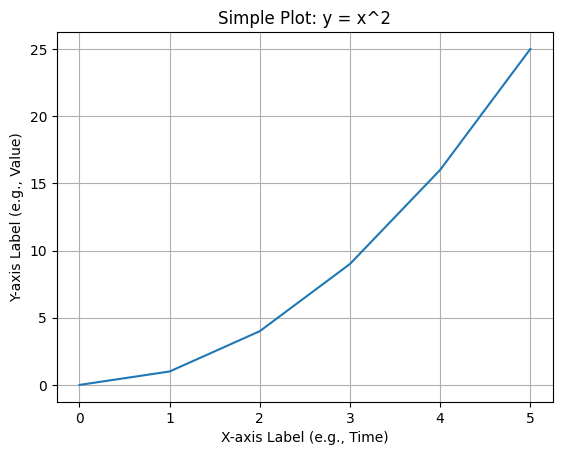

In [25]:
# A basic line plot using Matplotlib pyplot.
import matplotlib.pyplot as plt
import numpy as np # Often used with Matplotlib for data generation

# Data for plotting
x_values = np.array([0, 1, 2, 3, 4, 5])
y_values = np.array([0, 1, 4, 9, 16, 25]) # y = x^2

# Create the plot
plt.plot(x_values, y_values)

# Add labels and a title
plt.xlabel("X-axis Label (e.g., Time)")
plt.ylabel("Y-axis Label (e.g., Value)")
plt.title("Simple Plot: y = x^2")

# Add a grid (optional, but often helpful)
plt.grid(True)

# Display the plot
plt.show() # This command renders and displays the plot window

#### Plotting an Analytical ODE Solution
Let's combine NumPy and Matplotlib to plot the analytical solution to Newton's Law of Cooling:
$T(t) = T_{\text{env}} + (T_0 - T_{\text{env}}) e^{-kt}$

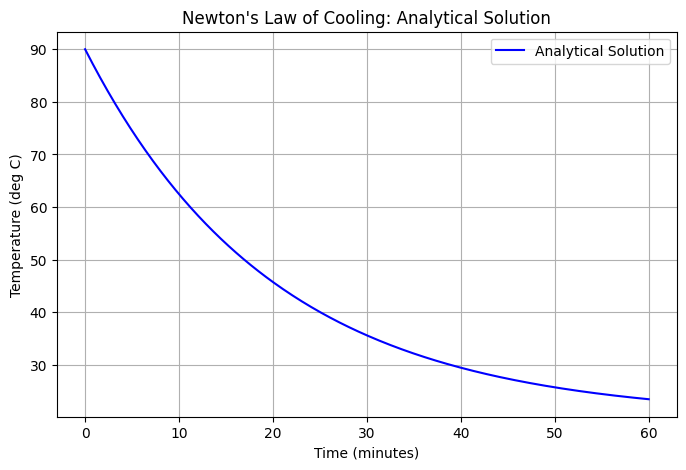

In [26]:
# Plotting the analytical solution of Newton's cooling law.
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Newton's cooling law
T_env = 20.0  # Ambient temperature (deg C)
T0 = 90.0     # Initial temperature of the body (deg C)
k_coeff = 0.05  # Cooling coefficient (e.g., 1/min)

# Time array for plotting (e.g., from 0 to 60 minutes)
time_array = np.linspace(0, 60, 300) # 300 points for a smooth curve

# Calculate the temperature using the analytical solution
Temperature_analytical = T_env + (T0 - T_env) * np.exp(-k_coeff * time_array)

# Create the plot
plt.figure(figsize=(8, 5)) # Optional: set figure size
plt.plot(time_array, Temperature_analytical, label="Analytical Solution", color="blue")

# Add labels, title, legend, and grid
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (deg C)")
plt.title("Newton's Law of Cooling: Analytical Solution")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Chapter Exercises

Test your understanding of the concepts covered in this chapter with the following exercises.

### E1: Classifying Differential Equations

For each of the following differential equations, classify it by stating:
1.  Whether it is an Ordinary Differential Equation (ODE) or a Partial Differential Equation (PDE).
2.  Its order.
3.  Whether it is linear or nonlinear. Justify your answer for linearity/nonlinearity briefly.

(a) $\frac{d^2y}{dx^2} + 2x \frac{dy}{dx} + y = \sin(x)$

(b) $\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$ (Burgers' equation, $\nu$ is constant)

(c) $\frac{dT}{dt} = -k(T^4 - T_s^4)$ (Stefan-Boltzmann law for radiative cooling, $k, T_s$ are constants)

(d) $\frac{\partial^2 P}{\partial x^2} + \frac{\partial^2 P}{\partial y^2} = F(x,y)$ (Poisson's equation for pressure $P$, $F(x,y)$ is a known source term)

(e) $L \frac{dI}{dt} + R I = V(t)$ (RL circuit equation for current $I$, $L, R$ constants, $V(t)$ known voltage)

(f) $\frac{\partial N}{\partial t} = D \frac{\partial^2 N}{\partial x^2} - \lambda N^2$ (Reaction-diffusion equation with a nonlinear reaction term, $D, \lambda$ constants)

*Write your answers for E1 in this Markdown cell. Double-click to edit.*

**(a)**
- **Type:**
- **Order:**
- **Linearity:**

**(b)**
- **Type:**
- **Order:**
- **Linearity:**

**(c)**
- **Type:**
- **Order:**
- **Linearity:**

**(d)**
- **Type:**
- **Order:**
- **Linearity:**

**(e)**
- **Type:**
- **Order:**
- **Linearity:**

**(f)**
- **Type:**
- **Order:**
- **Linearity:**

### E2: Python List Manipulations and Loops

Consider the following list representing depths (in meters) where rock samples were collected:
`depths = [10.5, 22.1, 15.0, 33.5, 8.2, 25.0, 19.7]`

Write Python code snippets to:
1.  Print the depth of the second sample collected.
2.  Print the last three depths using slicing with negative indices.
3.  Create a new list called `shallowSamples` containing only depths less than 20 meters. (Hint: You might use a `for` loop and an `if` statement).
4.  Calculate and print the average depth of all samples. (Hint: Sum all elements and divide by the number of elements. You can use a `for` loop to sum).
5.  Create a new list where each depth is converted from meters to feet (1 meter ≈ 3.28084 feet). Print the new list. Use a `for` loop.

In [ ]:
# Your code for E2 here
depths = [10.5, 22.1, 15.0, 33.5, 8.2, 25.0, 19.7]
print(f"Original list of depths: {depths}\n")

# 1. Print the depth of the second sample collected.
second_sample_depth = depths[1]
print(f"1. Depth of second sample: {second_sample_depth}")

# 2. Print the last three depths using slicing with negative indices.
last_three_depths = depths[-3:]
print(f"2. Last three depths: {last_three_depths}")

# 3. Create a new list called `shallowSamples` containing only depths less than 20 meters.
shallowSamples = []
for depth in depths:
    if depth < 20:
        shallowSamples.append(depth)
print(f"3. Shallow samples (< 20m): {shallowSamples}")

# 4. Calculate and print the average depth of all samples.
total_depth = 0
for depth in depths:
    total_depth += depth
average_depth = total_depth / len(depths)
print(f"4. Average depth: {average_depth:.2f} m")

# 5. Create a new list where each depth is converted from meters to feet.
depths_in_feet = []
m_to_ft = 3.28084
for depth in depths:
    depths_in_feet.append(depth * m_to_ft)
print(f"5. Depths in feet: {depths_in_feet}")

### E3: NumPy Array Operations

Perform the following tasks using NumPy:
1.  Create a NumPy array named `porosityValues` from the Python list `[0.12, 0.15, 0.08, 0.21, 0.17]`. Print the array, its shape, and its data type.
2.  Create a 1D NumPy array named `xCoordinates` containing 50 equally spaced points from -5.0 to 5.0 (inclusive).
3.  Create a 4x2 NumPy array named `matrixB` filled with the constant value 7.5.
4.  Given the arrays `vec1 = np.array([0.1, 0.2, 0.3, 0.4])` and `vec2 = np.array([10.0, 20.0, 30.0, 40.0])`:
    -   Calculate and print `vec1` multiplied by `vec2` (element-wise).
    -   Calculate and print the sine of each element in `vec1`.
    -   Calculate and print `vec2` minus 5.
5.  Create a 1D NumPy array of 10 random integers between 1 and 100 (inclusive). (Hint: look into `np.random.randint()`).

In [ ]:
# Your code for E3 here
import numpy as np

# 1. Create porosityValues array
print("--- Task 1 ---")
porosity_list = [0.12, 0.15, 0.08, 0.21, 0.17]
porosityValues = np.array(porosity_list)
print(f"Array: {porosityValues}")
print(f"Shape: {porosityValues.shape}")
print(f"Data type: {porosityValues.dtype}")

# 2. Create xCoordinates array
print("\n--- Task 2 ---")
xCoordinates = np.linspace(-5.0, 5.0, 50)
print(f"Created xCoordinates array with {len(xCoordinates)} points.")
print(f"First 5 values: {xCoordinates[:5]}")

# 3. Create matrixB
print("\n--- Task 3 ---")
matrixB = np.full((4, 2), 7.5)
print("Matrix B:\n", matrixB)

# 4. Vector operations
print("\n--- Task 4 ---")
vec1 = np.array([0.1, 0.2, 0.3, 0.4])
vec2 = np.array([10.0, 20.0, 30.0, 40.0])
print(f"vec1 * vec2 = {vec1 * vec2}")
print(f"sin(vec1) = {np.sin(vec1)}")
print(f"vec2 - 5 = {vec2 - 5}")

# 5. Random integers
print("\n--- Task 5 ---")
# randint's upper bound is exclusive, so we use 101 to include 100.
random_integers = np.random.randint(1, 101, 10)
print(f"10 random integers between 1 and 100: {random_integers}")

### E4: Basic Plotting with Matplotlib

1.  **Plotting a Geothermal Gradient:**
    Assume a simplified linear geothermal gradient where temperature $T$ increases with depth $z$ according to $T(z) = T_{surface} + G \cdot z$, where $T_{surface} = 15^\circ C$ and the geothermal gradient $G = 0.025^\circ C/meter$.
    -   Create a NumPy array for depths `zValues` from 0 to 2000 meters.
    -   Calculate the corresponding temperatures `Tvalues`.
    -   Use Matplotlib to create a line plot of Temperature vs. Depth.
    -   Label your axes and add a title and grid.

2.  **Multiple Functions on One Plot (using a loop):**
    You want to plot the functions $y = x^p$ for $p=1, 2, 3$ on the same graph, for $x$ ranging from 0 to 4.
    -   Create a NumPy array `xVals` for the x-axis.
    -   Create a list of powers: `powers = [1, 2, 3]`.
    -   Use a `for` loop to iterate and plot each curve, adding a label for each one.
    -   Add a title, axis labels, a legend, and a grid.

In [ ]:
# Your code for E4, Part 1: Geothermal Gradient
import matplotlib.pyplot as plt
import numpy as np

print("--- Plot 1: Geothermal Gradient ---")
# Parameters
T_surface = 15.0  # degrees C
G = 0.025         # degrees C / meter

# Create depth and temperature arrays
zValues = np.linspace(0, 2000, 100)
Tvalues = T_surface + G * zValues

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(zValues, Tvalues, color='red')

# Add labels, title, and grid
plt.xlabel("Depth (m)")
plt.ylabel("Temperature (°C)")
plt.title("Simplified Linear Geothermal Gradient")
plt.grid(True)
# Invert the y-axis to show depth increasing downwards, as is conventional
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Your code for E4, Part 2: Multiple Functions
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Plot 2: y = x^p ---")
# Create x-axis values and list of powers
xVals = np.linspace(0, 4, 100)
powers = [1, 2, 3]

# Create the plot
plt.figure(figsize=(8, 6))

# Loop through the powers and plot each function
for p in powers:
    yVals = xVals**p
    plt.plot(xVals, yVals, label=f'y = x^{p}')

# Add labels, title, legend, and grid
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x^p for p=1, 2, 3")
plt.legend()
plt.grid(True)
plt.show()